Run the following line if you don't have any of the libraries

In [1]:
# %%bash
# pip install statsmodels pandas numpy sklearn

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA

from sklearn.metrics import mean_squared_error as mse

import data_prep
import eval_utils
from eval_utils import build_and_model_VAR

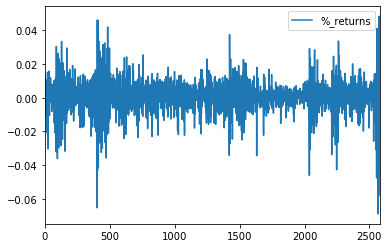

In [2]:
df_perc_returns = data_prep.get_perc_return("./data/SnP_500.csv", column_name="Open")
df_perc_returns.plot()

The way returns are distributed shows a stationary process with no correlation with time 
This also leads us to try out GARCH models since we proabably can model these spikes in volatility.

Following which, we'll look at the full dataset, a concatnation of all the variables together with S&P500

In [3]:
full_industries = ["Pharm", "Semicon", "Industrial", "Energy", "Financial", "Tech", "Utilities", "Consumer"]
full_df, idx_psuedo_OOB, idx_OOB = data_prep.split_data("./data/output.csv")
df = full_df[:idx_psuedo_OOB]

df = build_and_model_VAR(df, full_industries).dropna()
# t.to_csv("./data/output2.csv")

In [5]:
len(df)

2387

In [6]:
data_prep.get_lagged_df(df, col2lag=list(df.columns), n=3)

,Adj Close_Pharm_L1,Adj Close_Pharm_L2,Adj Close_Pharm_L3,Volume_Pharm_L1,Volume_Pharm_L2,Volume_Pharm_L3,Adj Close_Semicon_L1,Adj Close_Semicon_L2,Adj Close_Semicon_L3,Volume_Semicon_L1,...,Adj Close_Consumer_L3,Volume_Consumer_L1,Volume_Consumer_L2,Volume_Consumer_L3,Adj Close_SNP500_L1,Adj Close_SNP500_L2,Adj Close_SNP500_L3,Volume_SNP500_L1,Volume_SNP500_L2,Volume_SNP500_L3
Date,,,,,,,,,,,,,,,,,,,,,
8/1/2010,-0.164698,0.496613,-0.939242,764600.0,1492400.0,1933200.0,-0.780742,-0.247798,-0.563153,14338900.0,...,0.366668,5736700.0,4246900.0,6162200.0,0.400120,0.054552,0.311568,5.270680e+09,4.972660e+09,2.491020e+09
11/1/2010,0.029955,-0.164698,0.496613,1218200.0,764600.0,1492400.0,2.002905,-0.780742,-0.247798,20879500.0,...,0.132848,6438000.0,5736700.0,4246900.0,0.288173,0.400120,0.054552,4.389590e+09,5.270680e+09,4.972660e+09
12/1/2010,0.689881,0.029955,-0.164698,760800.0,1218200.0,764600.0,-0.350636,2.002905,-0.780742,15761700.0,...,0.829184,4173500.0,6438000.0,5736700.0,0.174676,0.288173,0.400120,4.255780e+09,4.389590e+09,5.270680e+09
13/1/2010,-0.327645,0.689881,0.029955,634800.0,760800.0,1218200.0,-3.553813,-0.350636,2.002905,18656400.0,...,-0.032884,5473400.0,4173500.0,6438000.0,-0.938117,0.174676,0.288173,4.716160e+09,4.255780e+09,4.389590e+09
14/1/2010,1.639196,-0.327645,0.689881,1028800.0,634800.0,760800.0,1.276894,-3.553813,-0.350636,16446800.0,...,-0.197455,4615800.0,5473400.0,4173500.0,0.832593,-0.938117,0.174676,4.170360e+09,4.716160e+09,4.255780e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24/6/2019,0.170556,0.000000,1.033946,53800.0,11200.0,19800.0,-0.473712,1.155693,0.235446,5239200.0,...,0.184189,5221200.0,4188600.0,3065300.0,-0.125922,0.947219,0.298516,5.000120e+09,3.905940e+09,3.287890e+09
25/6/2019,-0.885402,0.170556,0.000000,43700.0,53800.0,11200.0,0.186649,-0.473712,1.155693,6124400.0,...,0.693636,2890200.0,5221200.0,4188600.0,-0.173189,-0.125922,0.947219,3.136250e+09,5.000120e+09,3.905940e+09
26/6/2019,0.051540,-0.885402,0.170556,41000.0,43700.0,53800.0,-1.732652,0.186649,-0.473712,6157200.0,...,-0.463044,3197100.0,2890200.0,5221200.0,-0.949640,-0.173189,-0.125922,3.578050e+09,3.136250e+09,5.000120e+09


Columns are laballed as such:  VARIABLE_SECTOR

In [49]:
SNP_daily_ret = df['Adj Close_SNP500']
SNP_daily_ret = SNP_daily_ret.dropna()

In [50]:
psuedo_OOB = full_df.iloc[idx_psuedo_OOB-1:idx_OOB+1][:-1]
psuedo_OOB = build_and_model_VAR(psuedo_OOB,[]).dropna()
psuedo_OOB.to_csv("./data/psuedo_OOB.csv")

In [9]:
OOB = full_df.iloc[idx_OOB-1:]
OOB = build_and_model_VAR(OOB,[]).dropna()
OOB.to_csv("./data/OOB.csv")

In [10]:
res = AutoReg(SNP_daily_ret, 1,trend='n').fit()
res.summary()

c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:       Adj Close_SNP500   No. Observations:                 2387
Model:                     AutoReg(1)   Log Likelihood               -3232.046
Method:               Conditional MLE   S.D. of innovations              0.938
Date:                Mon, 13 Apr 2020   AIC                             -0.127
Time:                        21:14:39   BIC                             -0.122
Sample:                             1   HQIC                            -0.125
                                 2387                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Adj Close_SNP500.L1    -0.0432      0.020     -2.113      0.035      -0.083      -0.003
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -23.1391           +0.0000j           23.1391            0.5000
-----------------------------------------------------------------------------
"""

In [11]:
# res.predict(start=0, end=idx_OOB)[len(df)+1:]
mse(res.predict(start=0, end=idx_OOB)[len(df)+1:-1], psuedo_OOB['Adj Close_SNP500'])

c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


0.8631393116829238

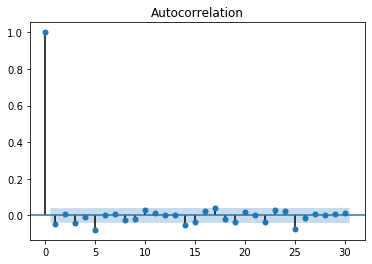

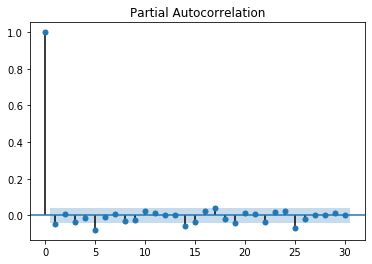

In [12]:
plot_acf(SNP_daily_ret, lags=30)
plt.show()
plot_pacf(SNP_daily_ret, lags=30)
plt.show()

Looking at both ACF and PACF, it seems that **AR(1)** fits the model well and there is no need for any MA components.

However, we want to see if ARMA models can reduce mse.

Hence, we look at **MA(1)** and **ARMA(1,1)** models. 

In [13]:
ma1 = ARMA(SNP_daily_ret, order=[0,1])
ma1_fit = ma1.fit(disp=0, trend='nc')
print (ma1_fit.summary())
print('\n')

arma11 = ARMA(SNP_daily_ret, order=[1,1])
arma11_fit = arma11.fit(disp=0, trend='nc')
print (arma11_fit.summary())
print('\n')

c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:       Adj Close_SNP500   No. Observations:                 2387
Model:                     ARMA(0, 1)   Log Likelihood               -3232.999
Method:                       css-mle   S.D. of innovations              0.938
Date:                Mon, 13 Apr 2020   AIC                           6469.998
Time:                        21:14:40   BIC                           6481.554
Sample:                             0   HQIC                          6474.203
                                                                              
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
ma.L1.Adj Close_SNP500    -0.0424      0.020     -2.091      0.037      -0.082      -0.003
                                    Roots                                    
                 

c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:       Adj Close_SNP500   No. Observations:                 2387
Model:                     ARMA(1, 1)   Log Likelihood               -3231.187
Method:                       css-mle   S.D. of innovations              0.937
Date:                Mon, 13 Apr 2020   AIC                           6468.373
Time:                        21:14:41   BIC                           6485.706
Sample:                             0   HQIC                          6474.681
                                                                              
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
ar.L1.Adj Close_SNP500    -0.7838      0.126     -6.240      0.000      -1.030      -0.538
ma.L1.Adj Close_SNP500     0.7479      0.134      5.576      0.000       0.485       1.011
    

Both models give the same AIC and BIC. We'll probably have to look at the mse to get a better understanding about how well the data is fitted to the dataset.

In [14]:
arma11_mse = mse(arma11_fit.forecast(len(psuedo_OOB))[0], psuedo_OOB['Adj Close_SNP500'])
ma1_mse = mse(ma1_fit.forecast(len(psuedo_OOB))[0], psuedo_OOB['Adj Close_SNP500'])

print("ARMA(1,1) mse: ", arma11_mse)
print("MA(1) mse: ", ma1_mse)

ARMA(1,1) mse:  0.86414090456116
MA(1) mse:  0.8637766873685678


Seems like MA(1)'s psuedo_OOB's mse is better than ARMA(1,1). However, because the predictive strength are almost similar, we keep both models for comparision 

So far, our benchmarked models are:
- AR(1)
- MA(1)
- ARMA(1,1)

Where AR(1) is best performing in terms of mse of psuedo OOB values

Moving on, we add more variables, to build ADL models that would hopefully beat our benchmark models

We'll start from one industry, build ARMA for models with lags $\in (1,5)$ and then look at their BIC values 

**Note:** we chose lags from 1 to 5 because 5 represents 1 trading week and we want to quickly be able to spot changes

We then choose the lagged_model with lowest BIC (BIC tend to give parsimonous model hence it would better fit our needs to prevent too many variables in our models to prevent overfitting) and iteratively add more industries up to the full model

Afterwords, we rid insignificant variables based on their t-stat. We do this iteratively with the final model till all the variables are significant. 

We note that this method may not be the best method since we didn't cover the full subset to see the lowest AIC/BIC but that is too computationally expensive.

By sampling 50 subsets of **n** variables, it will cover a signiicant subset and such iterative addition of variables is generally accepted in statistics.

In [15]:
## Adding more variables
from statsmodels.tsa.api import VAR
from statsmodels.regression.linear_model import OLS

# lagged_df_exog(industries=["Pharm","Utilities"], col2lag=list(pharm_utils.columns))
def lagged_df_exog(industries:list, target="Adj Close_SNP500", method="ARMA", order=[2,0], remove_vars=[]):
#     temp_df = build_and_model_VAR(df, industries)
    y = df[target]
    y = y.iloc[order[0]:]
    temp_df = df.copy().drop(target, axis=1)
    X_lagged = data_prep.get_lagged_df(temp_df,col2lag=list(temp_df.columns), n=order[0])  ## lags every single var
    
    if len(remove_vars) != 0:
        for colname in remove_vars:
            X_lagged = X_lagged.drop(colname, axis=1)
    
    if method == "ARMA":
        model = ARMA(y, order=order, exog=X_lagged)
    elif method == "OLS":
        model = OLS(y, X_lagged)
    else:
        raise Exception("method has to be 'ARMA' or 'OLS'.")
        
    results = model.fit(trend='nc')
    return results

full_industries = ["Pharm", "Semicon", "Industrial", "Energy", "Financial", "Tech", "Utilities", "Consumer"]
def best_lagged_model(industries:list, max_p_lag:int, max_q_lag=0, method="ARMA", start_ic=0, ic_method="BIC", print_summ=False):
    info = []
    ic = start_ic
    for p in range(1, max_p_lag+1):
        for q in range(max_q_lag+1):
            # q can be 0 but p has to be min 1
            try:
                temp_res = lagged_df_exog(industries=industries, order=[p,q])
                if print_summ:
                    print(temp_res.summary())
            except Exception:
                print(Exception)
                continue
            
            ## maybe can append ARMAResults into some global list.
            t = {
                    "order": [p,q],
                    "params": dict(temp_res.params),
                    "aic": temp_res.aic,
                    "bic": temp_res.bic,
                }
            info.append(t)
            if ic_method == "BIC":
                temp_ic = temp_res.bic
            elif ic_method == "AIC":
                temp_ic = temp_res.aic
            else:
                raise Exception("ic_method argument has to be 'BIC' or 'AIC'.")
            if ic == 0:  ## first iteration only
                ic = temp_ic
                res = temp_res
            elif temp_ic < ic:
                ic = temp_ic
                res = temp_res
    ## res will have the lowest ic. 
    ## info will be a list of dictionary
    return res, info

We look at the full model first and find the best lag for the full model.

In [16]:
## looks at all iteration. Will take very long to run this line of code. I took 45mins.
res_full, info = best_lagged_model(full_industries, 5,3,print_summ=True)

c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals"

                              ARMA Model Results                              
Dep. Variable:       Adj Close_SNP500   No. Observations:                 2386
Model:                     ARMA(1, 0)   Log Likelihood               -3214.569
Method:                       css-mle   S.D. of innovations              0.931
Date:                Mon, 13 Apr 2020   AIC                           6467.138
Time:                        21:14:44   BIC                           6576.908
Sample:                             0   HQIC                          6507.084
                                                                              
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Adj Close_Pharm_L1          0.0114      0.032      0.359      0.719      -0.051       0.074
Volume_Pharm_L1          8.644e-09   3.96e-08      0.218      0.827    -6.9e-08    8.63e-08


c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)


KeyboardInterrupt: 

In [ ]:
import json
with open('./arma_adl_full.json', 'w') as fout:
    json.dump(info , fout)
    
## To load it:
with open('./arma_adl_full.json', 'r') as fin:
    info = json.load(fin)  ## a list of fict

print(info)
## Note: Order of lowest AIC can be derived from info.

In [ ]:
print(res_full.summary())

Seems like **ARMA(1,0)** has the lowest BIC while **ARMA(2,0)** and **ARMA(2,1)** has the lowest AIC. We should include both models to consider

The full model has some variables where p-values are not significant. We remove some of those that have the highest p-values (> 0.5). And recompute the ARMA model after removing those variables.

In [22]:
print(lagged_df_exog(full_industries, order=[2, 0]).summary())
print(lagged_df_exog(full_industries, order=[2, 1]).summary())
print(lagged_df_exog(full_industries, order=[1, 1]).summary())

c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals"

                              ARMA Model Results                              
Dep. Variable:       Adj Close_SNP500   No. Observations:                 2385
Model:                     ARMA(2, 0)   Log Likelihood               -3186.484
Method:                       css-mle   S.D. of innovations              0.921
Date:                Mon, 13 Apr 2020   AIC                           6446.968
Time:                        21:31:11   BIC                           6660.715
Sample:                             0   HQIC                          6524.754
                                                                              
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Adj Close_Pharm_L1          0.0209      0.027      0.776      0.438      -0.032       0.074
Adj Close_Pharm_L2         -0.0612      0.032     -1.939      0.053      -0.123       0.001


c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals"

                              ARMA Model Results                              
Dep. Variable:       Adj Close_SNP500   No. Observations:                 2385
Model:                     ARMA(2, 1)   Log Likelihood               -3186.483
Method:                       css-mle   S.D. of innovations              0.921
Date:                Mon, 13 Apr 2020   AIC                           6448.965
Time:                        21:31:25   BIC                           6668.490
Sample:                             0   HQIC                          6528.854
                                                                              
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Adj Close_Pharm_L1          0.0209      0.025      0.829      0.407      -0.029       0.070
Adj Close_Pharm_L2         -0.0612      0.029     -2.076      0.038      -0.119      -0.003


c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals"

                              ARMA Model Results                              
Dep. Variable:       Adj Close_SNP500   No. Observations:                 2386
Model:                     ARMA(1, 1)   Log Likelihood               -3214.569
Method:                       css-mle   S.D. of innovations              0.931
Date:                Mon, 13 Apr 2020   AIC                           6469.138
Time:                        21:31:33   BIC                           6584.686
Sample:                             0   HQIC                          6511.187
                                                                              
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Adj Close_Pharm_L1          0.0114      0.030      0.376      0.707      -0.048       0.071
Volume_Pharm_L1          8.644e-09   3.79e-08      0.228      0.820   -6.57e-08     8.3e-08


In [23]:
res_full21 = lagged_df_exog(full_industries, order=[2, 1], remove_vars=["Adj Close_Pharm_L1", "Volume_Pharm_L1", "Volume_Pharm_L2", "Adj Close_Semicon_L2", "Adj Close_Industrial_L1", "Adj Close_Industrial_L2", "Volume_Industrial_L2", "Adj Close_Energy_L1", "Adj Close_Financial_L2", "Adj Close_Utilities_L2", "Adj Close_Consumer_L2"])
res_full20 = lagged_df_exog(full_industries, order=[2, 0], remove_vars=["Adj Close_Pharm_L1", "Volume_Pharm_L1", "Adj Close_Semicon_L2", "Volume_Semicon_L2", "Adj Close_Industrial_L1", "Adj Close_Industrial_L2", "Adj Close_Energy_L1", "Adj Close_Utilities_L2", "Volume_Consumer_L1", "Volume_Consumer_L2"])
res_full10 = lagged_df_exog(full_industries, order=[1, 0], remove_vars=["Adj Close_Pharm_L1", "Volume_Pharm_L1", "Adj Close_Industrial_L1", "Volume_Energy_L1", "Volume_Financial_L1", "Volume_Tech_L1", "Volume_Utilities_L1", "Volume_SNP500_L1"])
res_full11 = lagged_df_exog(full_industries, order=[1, 1], remove_vars=["Volume_SNP500_L1", "Volume_Utilities_L1", "Volume_Tech_L1", "Volume_Financial_L1", "Volume_Energy_L1", "Adj Close_Energy_L1", "Adj Close_Industrial_L1", "Adj Close_Pharm_L1", "Volume_Pharm_L1"])

c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals"

In [32]:
print(mse(res_full11.fittedvalues, df["Adj Close_SNP500"][:-1]))
print(mse(res_full21.fittedvalues, df["Adj Close_SNP500"][1:-1]))
print(mse(res_full10.fittedvalues, df["Adj Close_SNP500"][:-1]))
print(mse(res_full20.fittedvalues, df["Adj Close_SNP500"][1:-1]))


0.9705891115057972
0.9925474475839791
0.9726790234035895
0.992425868155026


In [24]:
print(res_full21.summary())
print(res_full20.summary())
print(res_full10.summary())
print(res_full11.summary())

                              ARMA Model Results                              
Dep. Variable:       Adj Close_SNP500   No. Observations:                 2385
Model:                     ARMA(2, 1)   Log Likelihood               -3190.987
Method:                       css-mle   S.D. of innovations              0.923
Date:                Mon, 13 Apr 2020   AIC                           6435.973
Time:                        21:33:39   BIC                           6591.951
Sample:                             0   HQIC                          6492.736
                                                                              
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Adj Close_Pharm_L2        -0.0424      0.028     -1.508      0.131      -0.097       0.013
Adj Close_Semicon_L1       0.0664      0.020      3.240      0.001       0.026       0.107
Volu

                              ARMA Model Results                              
Dep. Variable:       Adj Close_SNP500   No. Observations:                 2386
Model:                     ARMA(1, 1)   Log Likelihood               -3220.841
Method:                       css-mle   S.D. of innovations              0.933
Date:                Mon, 13 Apr 2020   AIC                           6463.681
Time:                        21:33:43   BIC                           6527.232
Sample:                             0   HQIC                          6486.808
                                                                              
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Adj Close_Semicon_L1       0.0697      0.026      2.729      0.006       0.020       0.120
Volume_Semicon_L1      -2.865e-09        nan        nan        nan         nan         nan
Volu

In [25]:
## get their respective MSE.
res_fn10 = eval_utils.forecast_ARMA_ADL(full_df, model=res_full10, start_idx=idx_psuedo_OOB, end_idx=idx_OOB)
res_fn11 = eval_utils.forecast_ARMA_ADL(full_df, model=res_full11, start_idx=idx_psuedo_OOB, end_idx=idx_OOB)
res_function20 = eval_utils.forecast_ARMA_ADL(full_df, model=res_full20, start_idx=idx_psuedo_OOB, end_idx=idx_OOB) 
res_function21 = eval_utils.forecast_ARMA_ADL(full_df, model=res_full21, start_idx=idx_psuedo_OOB, end_idx=idx_OOB) 

In [26]:
arma10_mse = mse(res_fn10['forecast'], psuedo_OOB['Adj Close_SNP500'])
arma11_mse = mse(res_fn11['forecast'], psuedo_OOB['Adj Close_SNP500'])
arma20_mse = mse(res_function20['forecast'], psuedo_OOB['Adj Close_SNP500'])
arma21_mse = mse(res_function21['forecast'], psuedo_OOB['Adj Close_SNP500'])

print("ARMA(1,0) mse:" ,arma10_mse )
print("ARMA(2,1) mse: ", arma21_mse)
print("ARMA(2,0) mse: ", arma20_mse)
print("ARMA(1,1) mse: ", arma11_mse)

ARMA(1,0) mse: 6.553895923319937
ARMA(2,1) mse:  0.8490003665091255
ARMA(2,0) mse:  13.691456089653407
ARMA(1,1) mse:  9.775182424668584


Surprising **ARMA(2,1)** performs best, better than **ARMA(1,1)**, **MA(1)** and **AR(1)**

**Rolling window prediction**

In [68]:
lags = 2
temp_df = build_and_model_VAR(full_df.copy(), full_industries)
y = temp_df["Adj Close_SNP500"][idx_psuedo_OOB-200:idx_psuedo_OOB]
temp_df = temp_df.drop("Adj Close_SNP500", axis=1)
temp_df = temp_df.iloc[idx_psuedo_OOB-200-lags:idx_psuedo_OOB]
X_lagged_roll = data_prep.get_lagged_df(temp_df,col2lag=list(temp_df.columns), n=lags)  ## lags every single var

In [69]:
data_prep.get_lagged_df(temp_df,col2lag=list(temp_df.columns), n=1)

,Adj Close_Pharm_L1,Volume_Pharm_L1,Adj Close_Semicon_L1,Volume_Semicon_L1,Adj Close_Industrial_L1,Volume_Industrial_L1,Adj Close_Energy_L1,Volume_Energy_L1,Adj Close_Financial_L1,Volume_Financial_L1,Adj Close_Tech_L1,Volume_Tech_L1,Adj Close_Utilities_L1,Volume_Utilities_L1,Adj Close_Consumer_L1,Volume_Consumer_L1,Volume_SNP500_L1
Date,,,,,,,,,,,,,,,,,
11/9/2018,-0.159673,13500.0,0.973261,3183400.0,0.654252,115900.0,-0.041220,8911700.0,-0.105895,29927200.0,0.312585,16654500.0,0.499067,9932400.0,0.372024,4054900.0,2.731400e+09
12/9/2018,-0.223885,8500.0,-1.253984,5205000.0,-0.074478,122800.0,0.948189,14281600.0,0.106008,32065200.0,0.853549,13594900.0,-0.257488,9046700.0,0.801657,4888000.0,2.899660e+09
13/9/2018,1.121979,74900.0,-1.146695,9254000.0,0.230380,157600.0,0.517286,12689400.0,-0.917741,47963400.0,-0.416460,16268200.0,-0.092199,9809900.0,0.188131,4572800.0,3.264930e+09
14/9/2018,0.554754,28000.0,1.227104,6730100.0,0.365078,86400.0,0.040650,11037400.0,-0.142513,44977100.0,1.173634,12727400.0,0.756726,8774200.0,0.170718,4714400.0,3.254930e+09
17/9/2018,-0.709315,301900.0,1.032296,5189200.0,0.572515,81900.0,0.527960,9494300.0,0.713525,34151000.0,-0.080009,9439200.0,-0.531239,13067500.0,-0.374927,3103200.0,3.149800e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24/6/2019,0.170556,53800.0,-0.473712,5239200.0,-0.518318,57700.0,0.722615,16356300.0,-0.223606,65322300.0,-0.472787,20715200.0,0.386797,15058200.0,-0.463044,5221200.0,5.000120e+09
25/6/2019,-0.885402,43700.0,0.186649,6124400.0,-0.407662,49500.0,-0.896789,10396600.0,-0.404112,48377800.0,0.191547,8215900.0,0.032783,9887200.0,-0.535482,2890200.0,3.136250e+09
26/6/2019,0.051540,41000.0,-1.732652,6157200.0,-0.555056,62900.0,-0.793777,11887300.0,-0.331981,47748500.0,-1.835333,13122700.0,-0.606451,12145400.0,-0.958946,3197100.0,3.578050e+09


In [70]:
lag1 = data_prep.get_perc_return_df(full_df["Adj Close_SNP500"][idx_psuedo_OOB-200-2:idx_psuedo_OOB]).dropna()

In [71]:
rolling_mod21 = ARMA(y, order=[2,1], exog=X_lagged_roll).fit(trend='nc')
rolling_mod10 = ARMA(lag1, order=[1,0], exog=data_prep.get_lagged_df(temp_df,col2lag=list(temp_df.columns), n=1)).fit(trend='nc')

c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals"

In [65]:
print(rolling_mod21.summary())
print(rolling_mod10.summary())

                              ARMA Model Results                              
Dep. Variable:       Adj Close_SNP500   No. Observations:                  200
Model:                     ARMA(2, 1)   Log Likelihood                -269.117
Method:                       css-mle   S.D. of innovations              0.930
Date:                Tue, 14 Apr 2020   AIC                            614.233
Time:                        14:51:59   BIC                            739.569
Sample:                             0   HQIC                           664.955
                                                                              
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Adj Close_Pharm_L1          0.1221      0.100      1.223      0.221      -0.074       0.318
Adj Close_Pharm_L2          0.0890      0.098      0.906      0.365      -0.103       0.282


In [72]:
res_roll21 = eval_utils.forecast_ARMA_ADL(full_df, model=rolling_mod21, start_idx=idx_psuedo_OOB, end_idx=idx_OOB)
res_roll10 = eval_utils.forecast_ARMA_ADL(full_df, model=rolling_mod10, start_idx=idx_psuedo_OOB, end_idx=idx_OOB) 

**Evaluation:**

Looking at the AIC's and BIC's of all of the models being compared to determine the best ARMA+exogeneous variables, it seems like adding MA components generally increases AIC and BIC, hence ARMA(1,0)+exogeneous variables is the best model in the subset of models (in terms of lowest BIC). 

There might be some correlation between the endogeneous variables and exogeneous variables, and not much random error. Hence, adding random errors actually lowers the effectiveness of the model in predicting daily percentage change in SNP500.

Let's take variable `res_full22` and `res_full10` as the final model for ARMA with exogeneous variables. This models behaves similar to an ADL model, since there are no lags. involved.

In [27]:
%matplotlib inline

n-steps forecasting

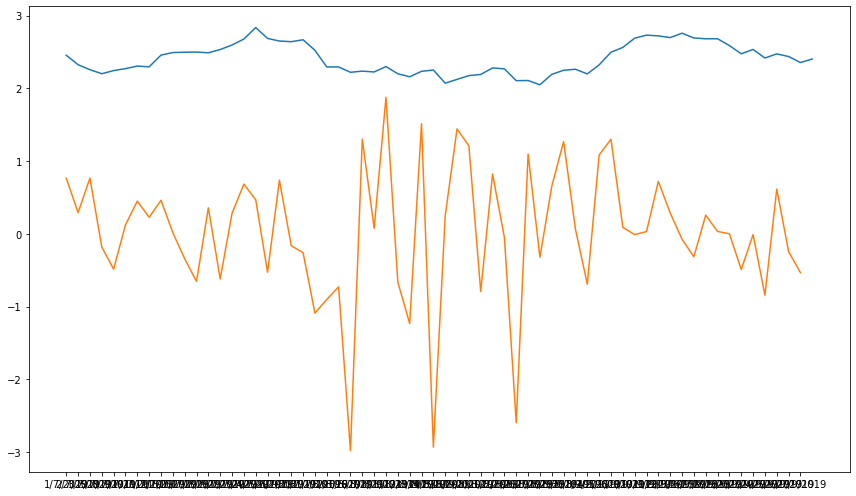

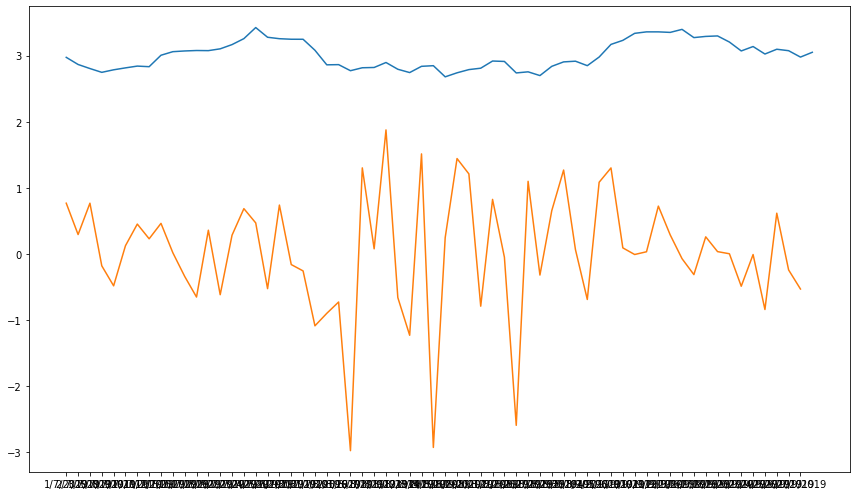

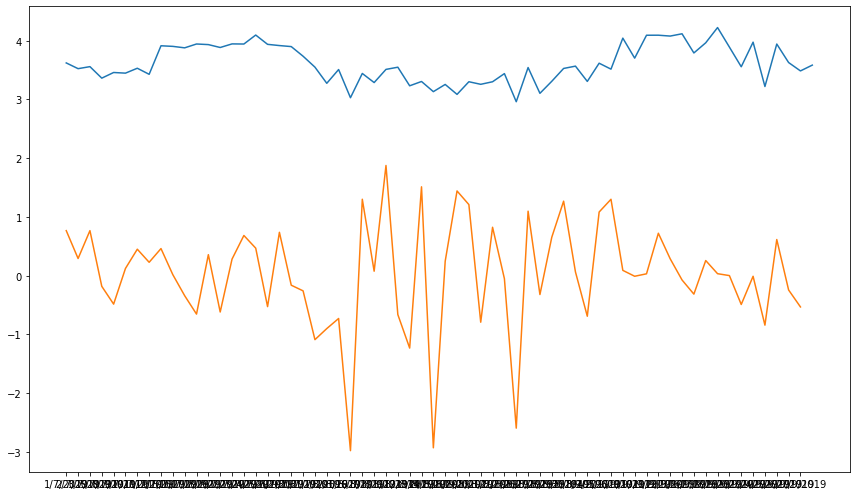

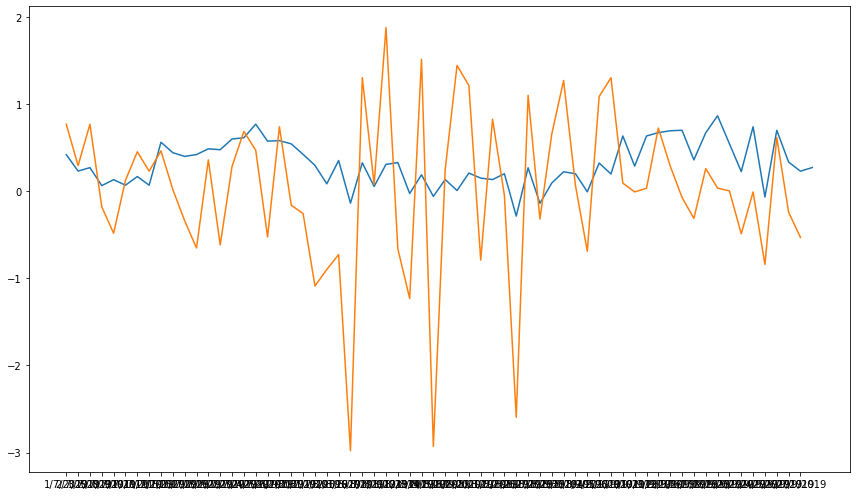

In [28]:
eval_utils.predicted_views(psuedo_OOB['Adj Close_SNP500'][:-1], res_fn10['forecast'])
eval_utils.predicted_views(psuedo_OOB['Adj Close_SNP500'][:-1], res_fn11['forecast'])
eval_utils.predicted_views(psuedo_OOB['Adj Close_SNP500'][:-1], res_function20['forecast'])
eval_utils.predicted_views(psuedo_OOB['Adj Close_SNP500'][:-1], res_function21['forecast'])

Rolling windows

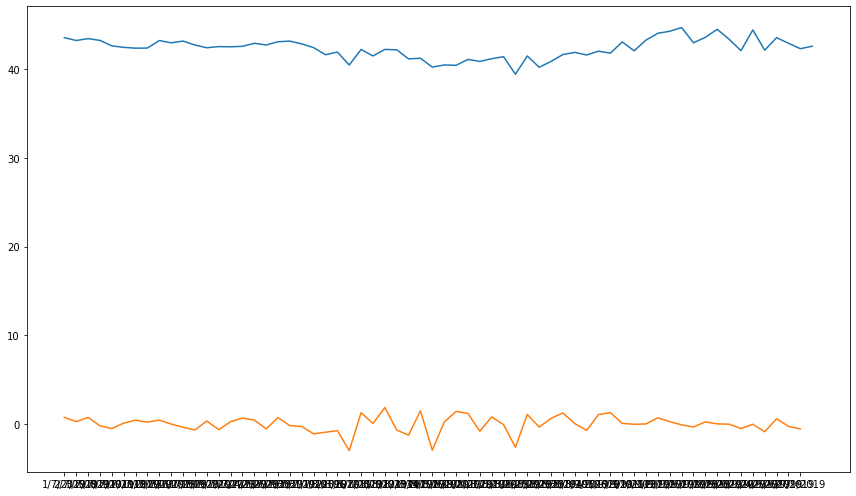

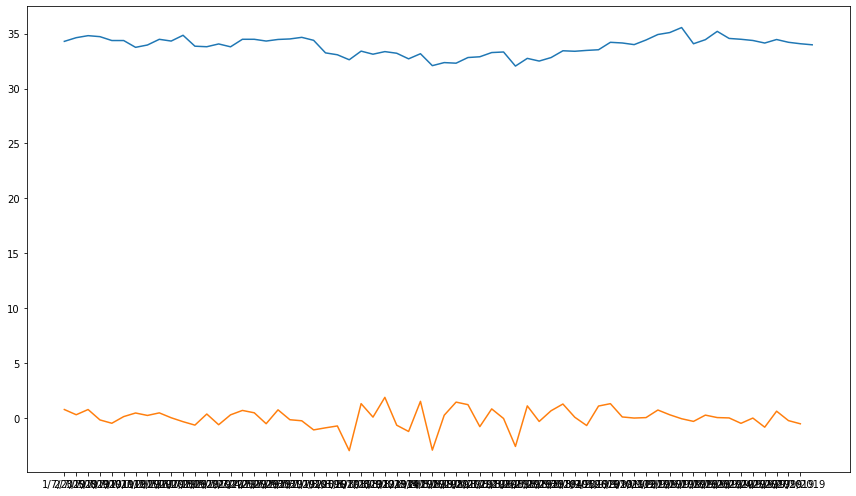

In [73]:
eval_utils.predicted_views(psuedo_OOB['Adj Close_SNP500'][:-1], res_roll21['forecast'])
eval_utils.predicted_views(psuedo_OOB['Adj Close_SNP500'][:-1], res_roll10['forecast'])

### Ensemble Methods

In [75]:
import ensemble

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [76]:
full_df, idx_psuedo_OOB, idx_OOB = data_prep.split_data("./data/output.csv")
df = full_df[:idx_psuedo_OOB]

df = build_and_model_VAR(df, full_industries).dropna()

psuedo_OOB = full_df.iloc[idx_psuedo_OOB-1:idx_OOB+1]
psuedo_OOB = build_and_model_VAR(psuedo_OOB,[]).dropna()

df['target'] = df['Adj Close_SNP500'].apply(ensemble.encode_labels)
lags= 5

train_df = df.drop("target", axis=1)
X_lagged = data_prep.get_lagged_df(train_df, col2lag=train_df.columns, n=lags)

full_df = build_and_model_VAR(full_df, full_industries).dropna()
full_lagged = data_prep.get_lagged_df(full_df, col2lag=full_df.columns, n=lags)
lagged_OOB = full_lagged.iloc[idx_psuedo_OOB-lags:idx_OOB-lags]

Regression code

In [36]:
y = df['Adj Close_SNP500'][lags:]
# print(y.head())
# print(X_lagged.head())
lasso = Lasso(warm_start=True)
reg = RandomForestRegressor(n_estimators=100, min_impurity_split=2, min_samples_leaf=1)
# params = {
#     "n_estimators": [100],
#     "min_samples_split" : [2, 5, 10],
#     "min_samples_leaf" : [1, 4, 10],
# }
# reg = GridSearchCV(reg, params, verbose=2, n_jobs=4)
# print(reg.get_params())
reg.fit(X_lagged,y)
lasso.fit(X_lagged,y)

y_pred2 = ensemble.iterative_pred(lasso, lagged_OOB) 
print(y_pred2)
print("\nRolling:\n")
rolling_ypred2 = ensemble.iterative_pred(lasso,lagged_OOB, iterative=True)
print(rolling_ypred2)
print("lasso mse: ", mean_squared_error(y_pred2, full_df["Adj Close_SNP500"].iloc[idx_psuedo_OOB-lags:idx_OOB-lags]))

y_pred = ensemble.iterative_pred(reg, lagged_OOB, iterative=True)
print(y_pred)
print("RFR mse: ", mean_squared_error(y_pred, full_df["Adj Close_SNP500"].iloc[idx_psuedo_OOB-lags:idx_OOB-lags]))

[ 0.11540556 -0.17753753  0.19109726  0.13613764  0.10829873 -0.12095974
 -0.08315279 -0.10580145  0.23667335 -0.00743049  0.02015011 -0.03462873
  0.00236029 -0.00810369  0.04681157 -0.03984722  0.02938327 -0.0701035
 -0.06832099 -0.10137797 -0.08265374 -0.08494538 -0.21216131  0.08244262
 -0.24776437  0.09960747 -0.0926148   0.13751793  0.24406596 -0.07999684
  0.12470024 -0.00103438  0.19351699 -0.13612844  0.17349436 -0.02353224
  0.0235011   0.12570021 -0.24579037  0.23419594 -0.07703353  0.03147046
  0.08278613  0.07121086 -0.09912264  0.0951023  -0.18839642  0.27032189
 -0.29150626 -0.02352072 -0.12291998  0.10059457  0.17016579 -0.11687354
 -0.00482831  0.13846656  0.15936567  0.07657168  0.38511771 -0.64140381
  0.37906815  0.016455    0.07783255 -0.12405694]

Rolling:

[0.11540555533091554, -0.17753752716078966, 0.19109725964485721, 0.13613764260349845, 0.10829873304026419, -0.1209597446886542, -0.08315278827413894, -0.10580144586629278, 0.2366733481098023, -0.007430486332499

In [ ]:
plt.plot(y_pred, label='predicted')
plt.plot(full_df["Adj Close_SNP500"].iloc[idx_psuedo_OOB-lags:idx_OOB-lags], label='actual')
plt.title("Random Forest Regression: Psuedo-OOB Prediction")
plt.legend()
plt.show()

In [35]:
plt.plot(y_pred2, label='predicted')
plt.plot(full_df["Adj Close_SNP500"].iloc[idx_psuedo_OOB-lags:idx_OOB-lags], label='actual')
plt.title("Lasso Regression: Psuedo-OOB Prediction")
plt.legend()
plt.show()

NameError: name 'y_pred2' is not defined

Classification Code

In [77]:
y = df['target'][lags:]
clf = RandomForestClassifier(min_samples_split=2, n_estimators=100)
clf.fit(X_lagged, y)
full_df["target"] = full_df['Adj Close_SNP500'].apply(ensemble.encode_labels)
y_true = full_df["target"].iloc[idx_psuedo_OOB-lags:idx_OOB-lags]
y_preds = ensemble.iterative_pred(clf, lagged_OOB, iterative=True)
print(accuracy_score(y_preds, y_true))
print(confusion_matrix(y_preds, y_true))

0.953125
[[ 0  0]
 [ 3 61]]


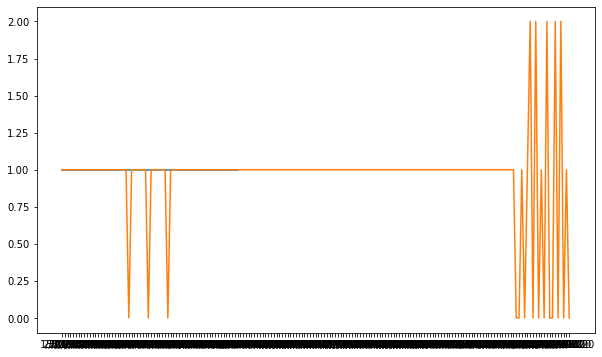

In [83]:
plt.figure(figsize=(10,6))
plt.plot(y_preds, label="predicted")
plt.plot(y_true, label="actual")

In [78]:
y_true= full_df["target"].iloc[idx_psuedo_OOB-1:]
X_test = data_prep.get_lagged_df(full_df, col2lag=train_df.columns, n=lags)[idx_psuedo_OOB-lags-1:]
y_test = clf.predict(X_test)

In [79]:
print(accuracy_score(y_test, y_true))
print(confusion_matrix(y_test, y_true))

0.912568306010929
[[  2   0   0]
 [  7 163   3]
 [  5   1   2]]


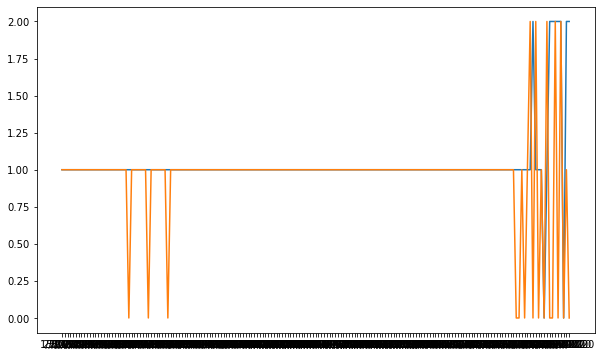

In [82]:
plt.figure(figsize=(10,6))
plt.plot(y_test, label="predicted") 
plt.plot(y_true, label="actual")